In [1]:
clear all;
clc

### Reading data

In [2]:
Data20F     = readtable('Data.csv');
startDate   = datenum('08-03-2017');  % This is the first day in our sample
endDate     = datenum('01-31-2023');  % This is the last day in our sample
xData       = linspace(startDate, endDate, height(Data20F(end-1382:end,1)));
xData       = datenum(xData);

In [3]:
benchmark    = table2array(Data20F(end-1382:end,2));
factors      = table2array(Data20F(end-1382:end,4:23));

In [4]:
equity_factors = factors(:, 1:7);
currency_factors = factors(:, 8:14);
crypto_factors = factors(:, 15:20);

In [5]:
equity_factor_names = {'SMB';
                       'HML';
                       'RMV';
                       'CMA';
                       'MOM';
                       'ST REV';
                       'LT REV'};

crypto_factor_names = {'Twitter followers';
                       'Marketcap';
                       'BM';
                       'Max30';
                       'r30 0';
                       'Rvol30'};

currency_factor_names = {'CAR';
                         'MOM1';
                         'MOM3';
                         'MOM6';
                         'MOM12';
                         'VOL';
                         'VRP'};

### Computing key metrics

In [6]:
function calculate_metrics(rp)

    MN    = mean(rp(:)) * 252;
    SD    = std(rp(:)) *sqrt(252);
    SR    = (mean(rp(:))/std(rp(:))) *sqrt(252);
    KT    = kurtosis(rp(:));
    SW    = skewness(rp(:));
    MDD   = maxdrawdown(exp(cumsum(log(1+rp(:)))));

    cumulative_rp = exp(cumsum(log(1+rp)));
    cumulative_max = cummax(cumulative_rp);
    drawdowns = (cumulative_max - cumulative_rp) ./ cumulative_max;
    UI = sqrt(mean(drawdowns .^ 2));

    fprintf('Mean = %4.3f \n', MN)
    fprintf('Std = %4.3f \n', SD)
    fprintf('Sharpe ratio = %4.3f \n', SR)
    %fprintf('Kurtosis = %4.3f \n', KT)
    %fprintf('Skewness = %4.3f \n', SW)
    fprintf('MDD = %4.3f \n', MDD)
    fprintf('UI = %4.3f \n', UI * sqrt(252))

end

### Plotting comulative returns

In [7]:
function plot_comulative_returns(xData, rp, factor_names)

    factor_num = size(factor_names, 1);
    figure;
    for i = 1:factor_num
        plot(xData(:), exp(cumsum(log(1+rp(:,i)))), 'LineWidth', 1.5);
        hold on
    end

    datetick('x', 'yyyy', 'keeplimits')
    recessionplot
    axis([xData(1) xData(end) -inf inf])
    xlabel('Years');
    ylabel('Wealth of an investor, $')
    title(append('Commulative return'))
    legend(factor_names, 'Location', 'Northwest', 'FontSize', 8)

end

### Equity

In [8]:
for nf = 1:size(equity_factors, 2)
    fprintf(equity_factor_names{nf})
    calculate_metrics(equity_factors(:, nf));
end

SMB
Mean = 0.000 
Std = 0.115 
Sharpe ratio = 0.003 
MDD = 0.329 
UI = 2.407 
HML
Mean = -0.012 
Std = 0.169 
Sharpe ratio = -0.073 
MDD = 0.467 
UI = 4.047 
RMV
Mean = 0.049 
Std = 0.094 
Sharpe ratio = 0.526 
MDD = 0.148 
UI = 0.670 
CMA
Mean = 0.032 
Std = 0.083 
Sharpe ratio = 0.393 
MDD = 0.164 
UI = 1.298 
MOM
Mean = 0.009 
Std = 0.203 
Sharpe ratio = 0.042 
MDD = 0.397 
UI = 3.292 
ST REV
Mean = 0.072 
Std = 0.191 
Sharpe ratio = 0.379 
MDD = 0.358 
UI = 0.853 
LT REV
Mean = 0.008 
Std = 0.125 
Sharpe ratio = 0.068 
MDD = 0.351 
UI = 2.979


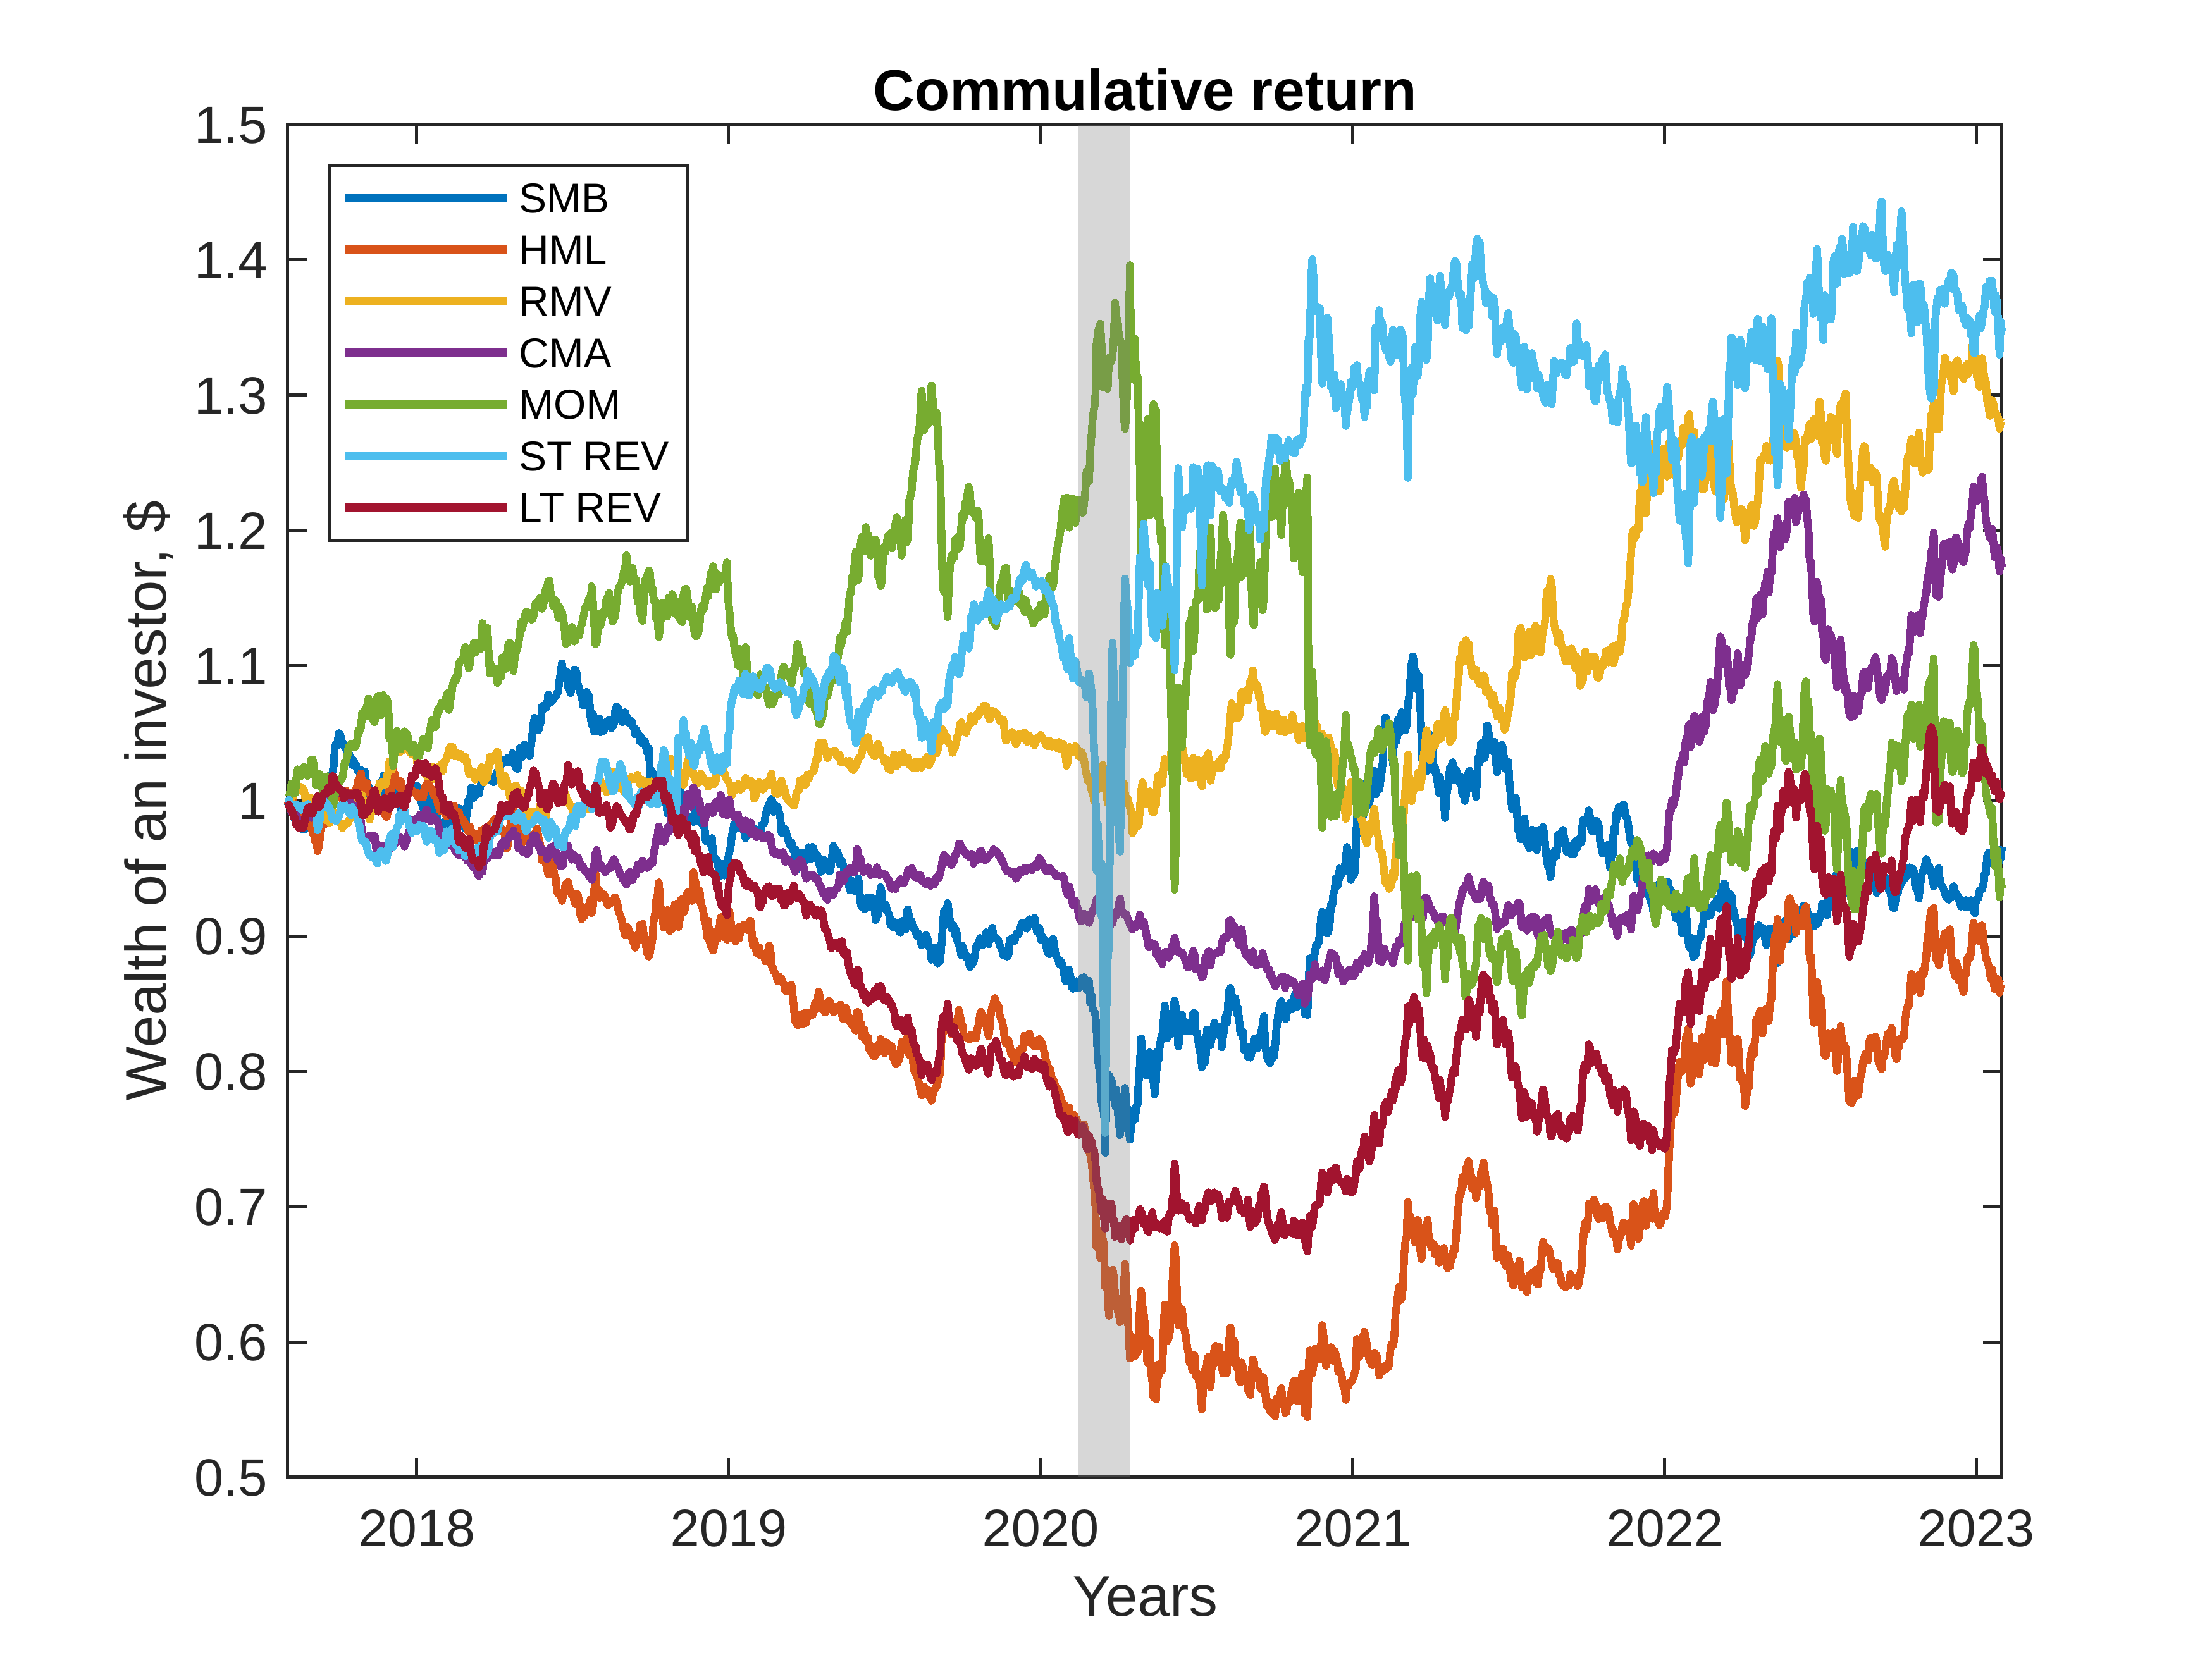

In [9]:
plot_comulative_returns(xData, equity_factors, equity_factor_names);

### Currency

In [10]:
for nf = 1:size(currency_factors, 2)
    fprintf(currency_factor_names{nf})
    calculate_metrics(currency_factors(:, nf));
end

CAR
Mean = 0.006 
Std = 0.110 
Sharpe ratio = 0.057 
MDD = 0.248 
UI = 1.935 
MOM1
Mean = 0.045 
Std = 0.095 
Sharpe ratio = 0.473 
MDD = 0.153 
UI = 1.302 
MOM3
Mean = 0.063 
Std = 0.092 
Sharpe ratio = 0.685 
MDD = 0.139 
UI = 0.828 
MOM6
Mean = 0.005 
Std = 0.095 
Sharpe ratio = 0.053 
MDD = 0.287 
UI = 2.785 
MOM12
Mean = 0.036 
Std = 0.096 
Sharpe ratio = 0.373 
MDD = 0.154 
UI = 1.044 
VOL
Mean = 0.015 
Std = 0.108 
Sharpe ratio = 0.139 
MDD = 0.166 
UI = 1.600 
VRP
Mean = 0.040 
Std = 0.090 
Sharpe ratio = 0.440 
MDD = 0.217 
UI = 1.329


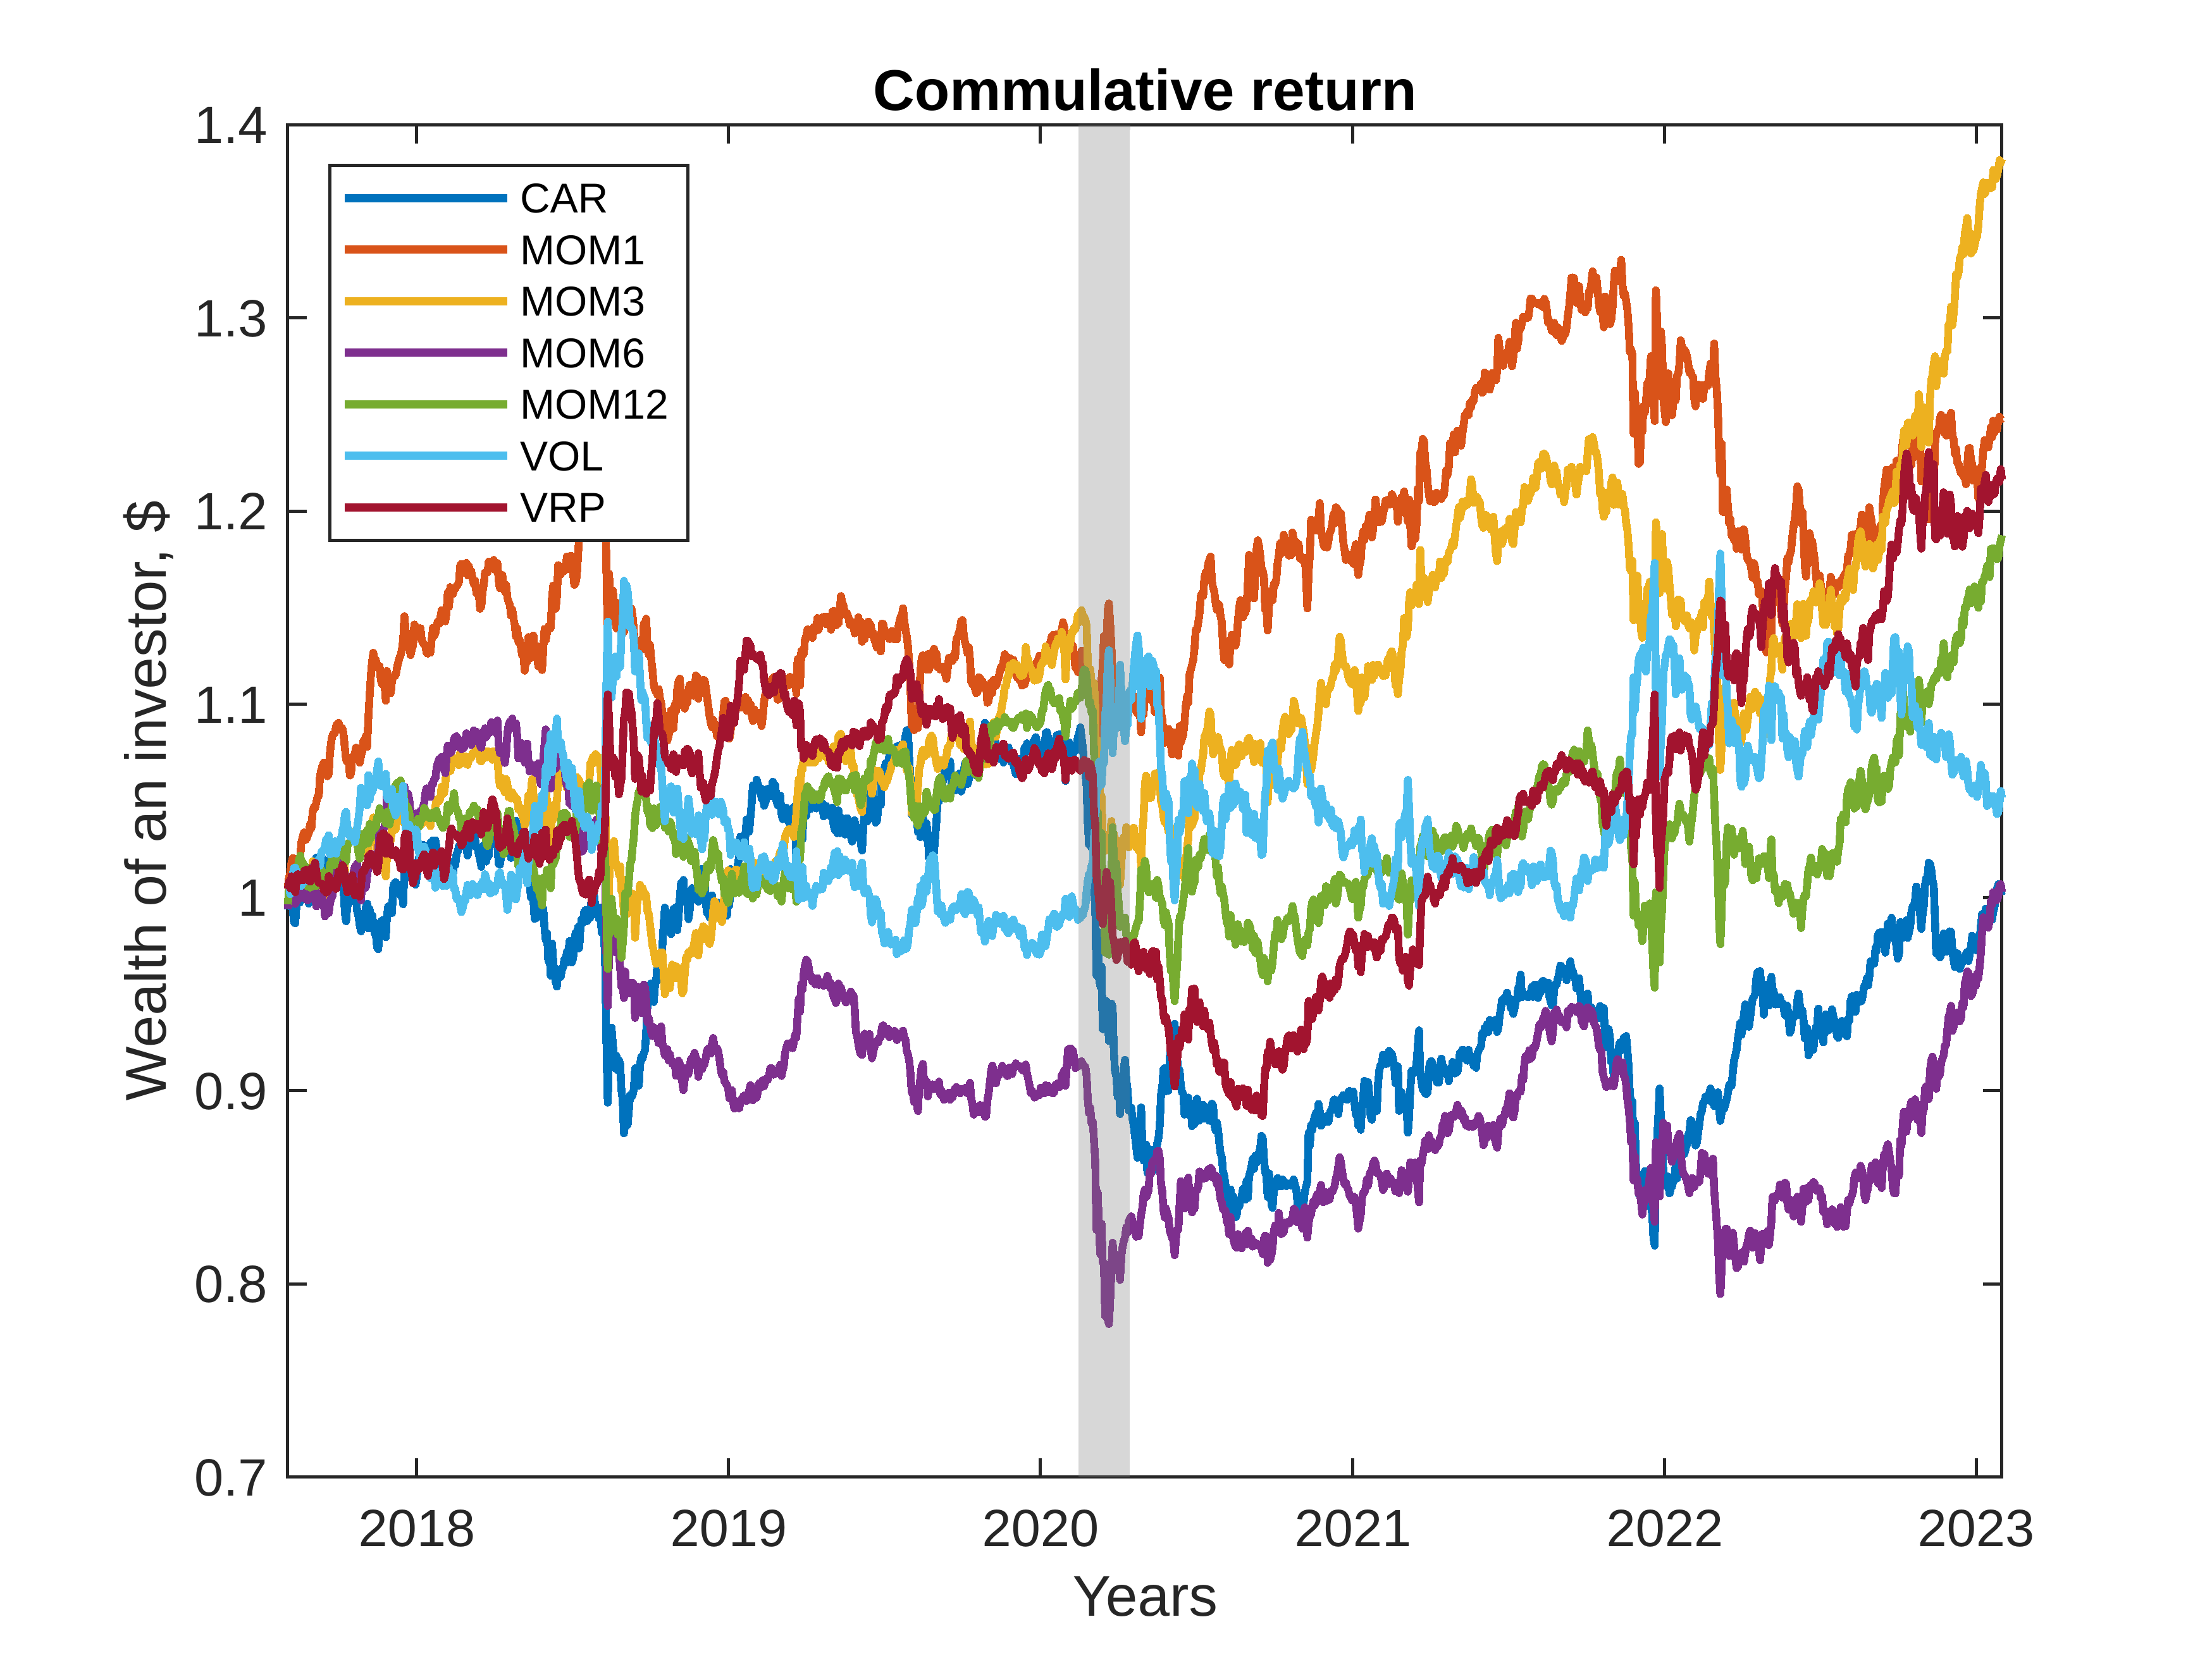

In [11]:
plot_comulative_returns(xData, currency_factors, currency_factor_names);

### Cryptocurrency

In [12]:
for nf = 1:size(crypto_factors, 2)
    fprintf(crypto_factor_names{nf})
    calculate_metrics(crypto_factors(:, nf));
end

Twitter followers
Mean = 0.793 
Std = 0.670 
Sharpe ratio = 1.183 
MDD = 0.712 
UI = 3.711 
Marketcap
Mean = 0.609 
Std = 0.517 
Sharpe ratio = 1.178 
MDD = 0.758 
UI = 5.649 
BM
Mean = 0.361 
Std = 0.744 
Sharpe ratio = 0.485 
MDD = 0.807 
UI = 8.056 
Max30
Mean = 3.266 
Std = 1.145 
Sharpe ratio = 2.851 
MDD = 0.736 
UI = 3.816 
r30 0
Mean = 1.154 
Std = 0.936 
Sharpe ratio = 1.233 
MDD = 0.733 
UI = 4.672 
Rvol30
Mean = 3.454 
Std = 1.199 
Sharpe ratio = 2.880 
MDD = 0.755 
UI = 3.697


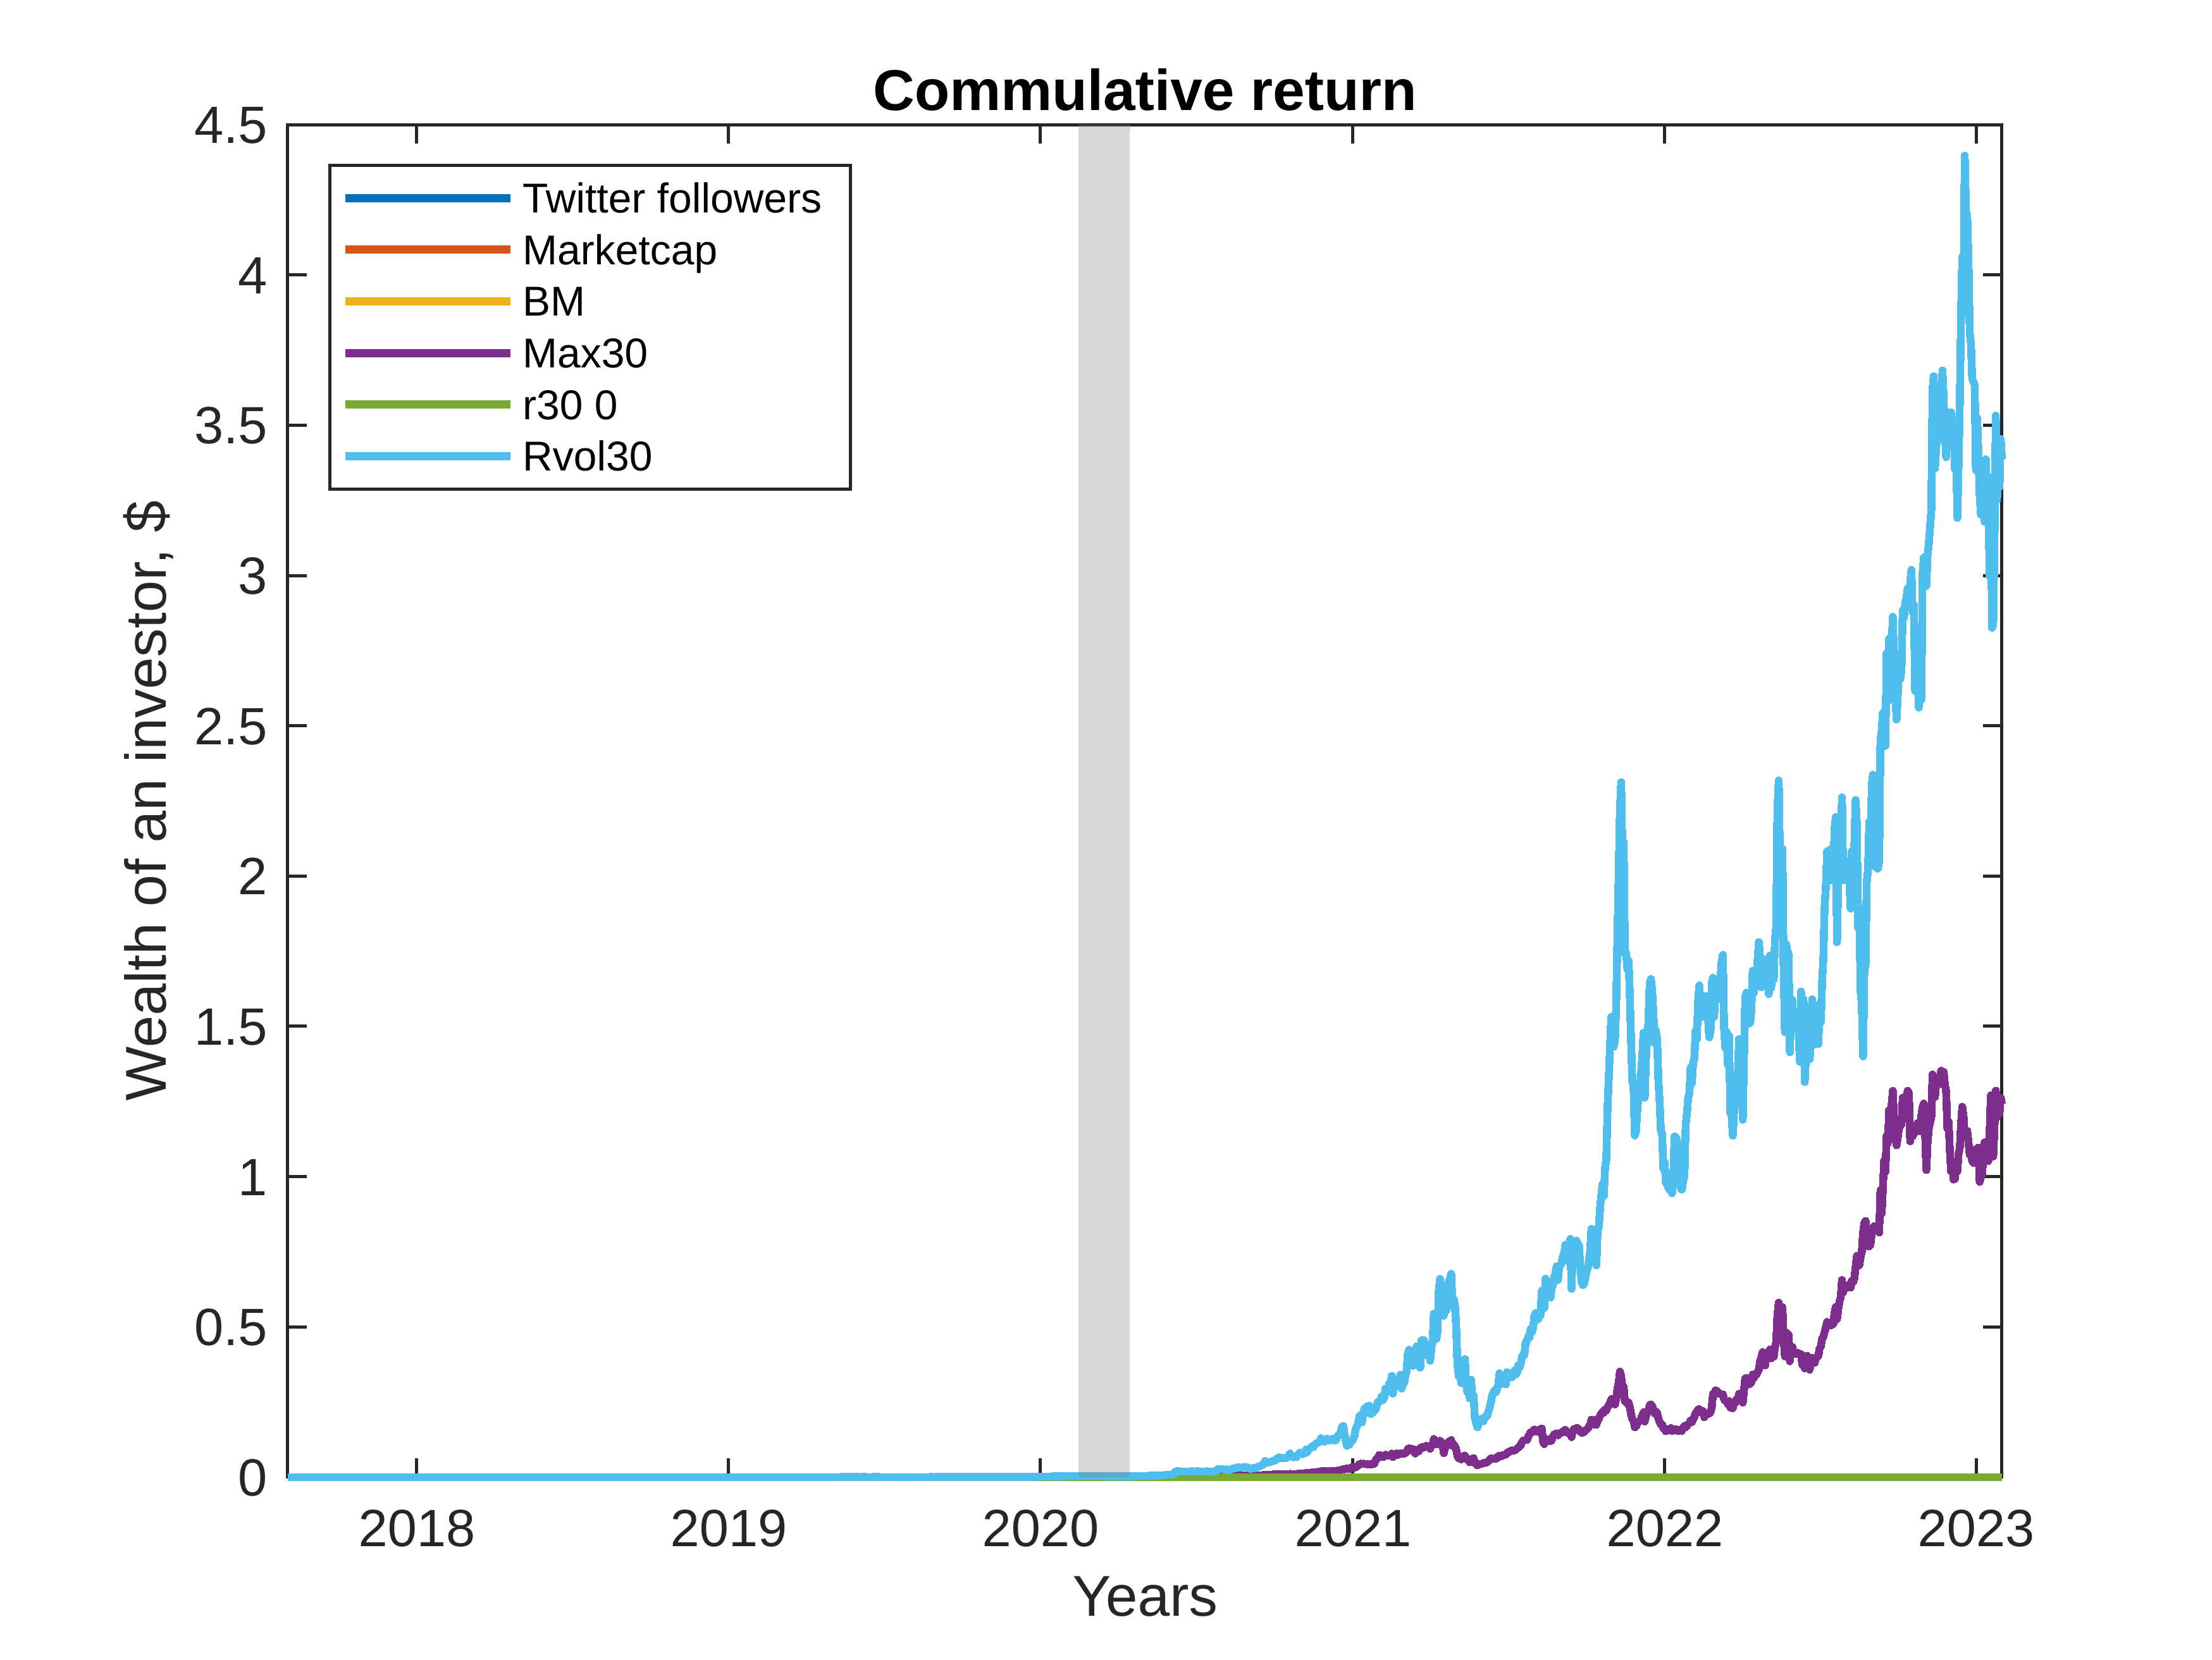

In [13]:
plot_comulative_returns(xData, crypto_factors, crypto_factor_names);

### Equity market

In [14]:
calculate_metrics(benchmark);

Mean = 0.116 
Std = 0.215 
Sharpe ratio = 0.540 
MDD = 0.343 
UI = 1.509


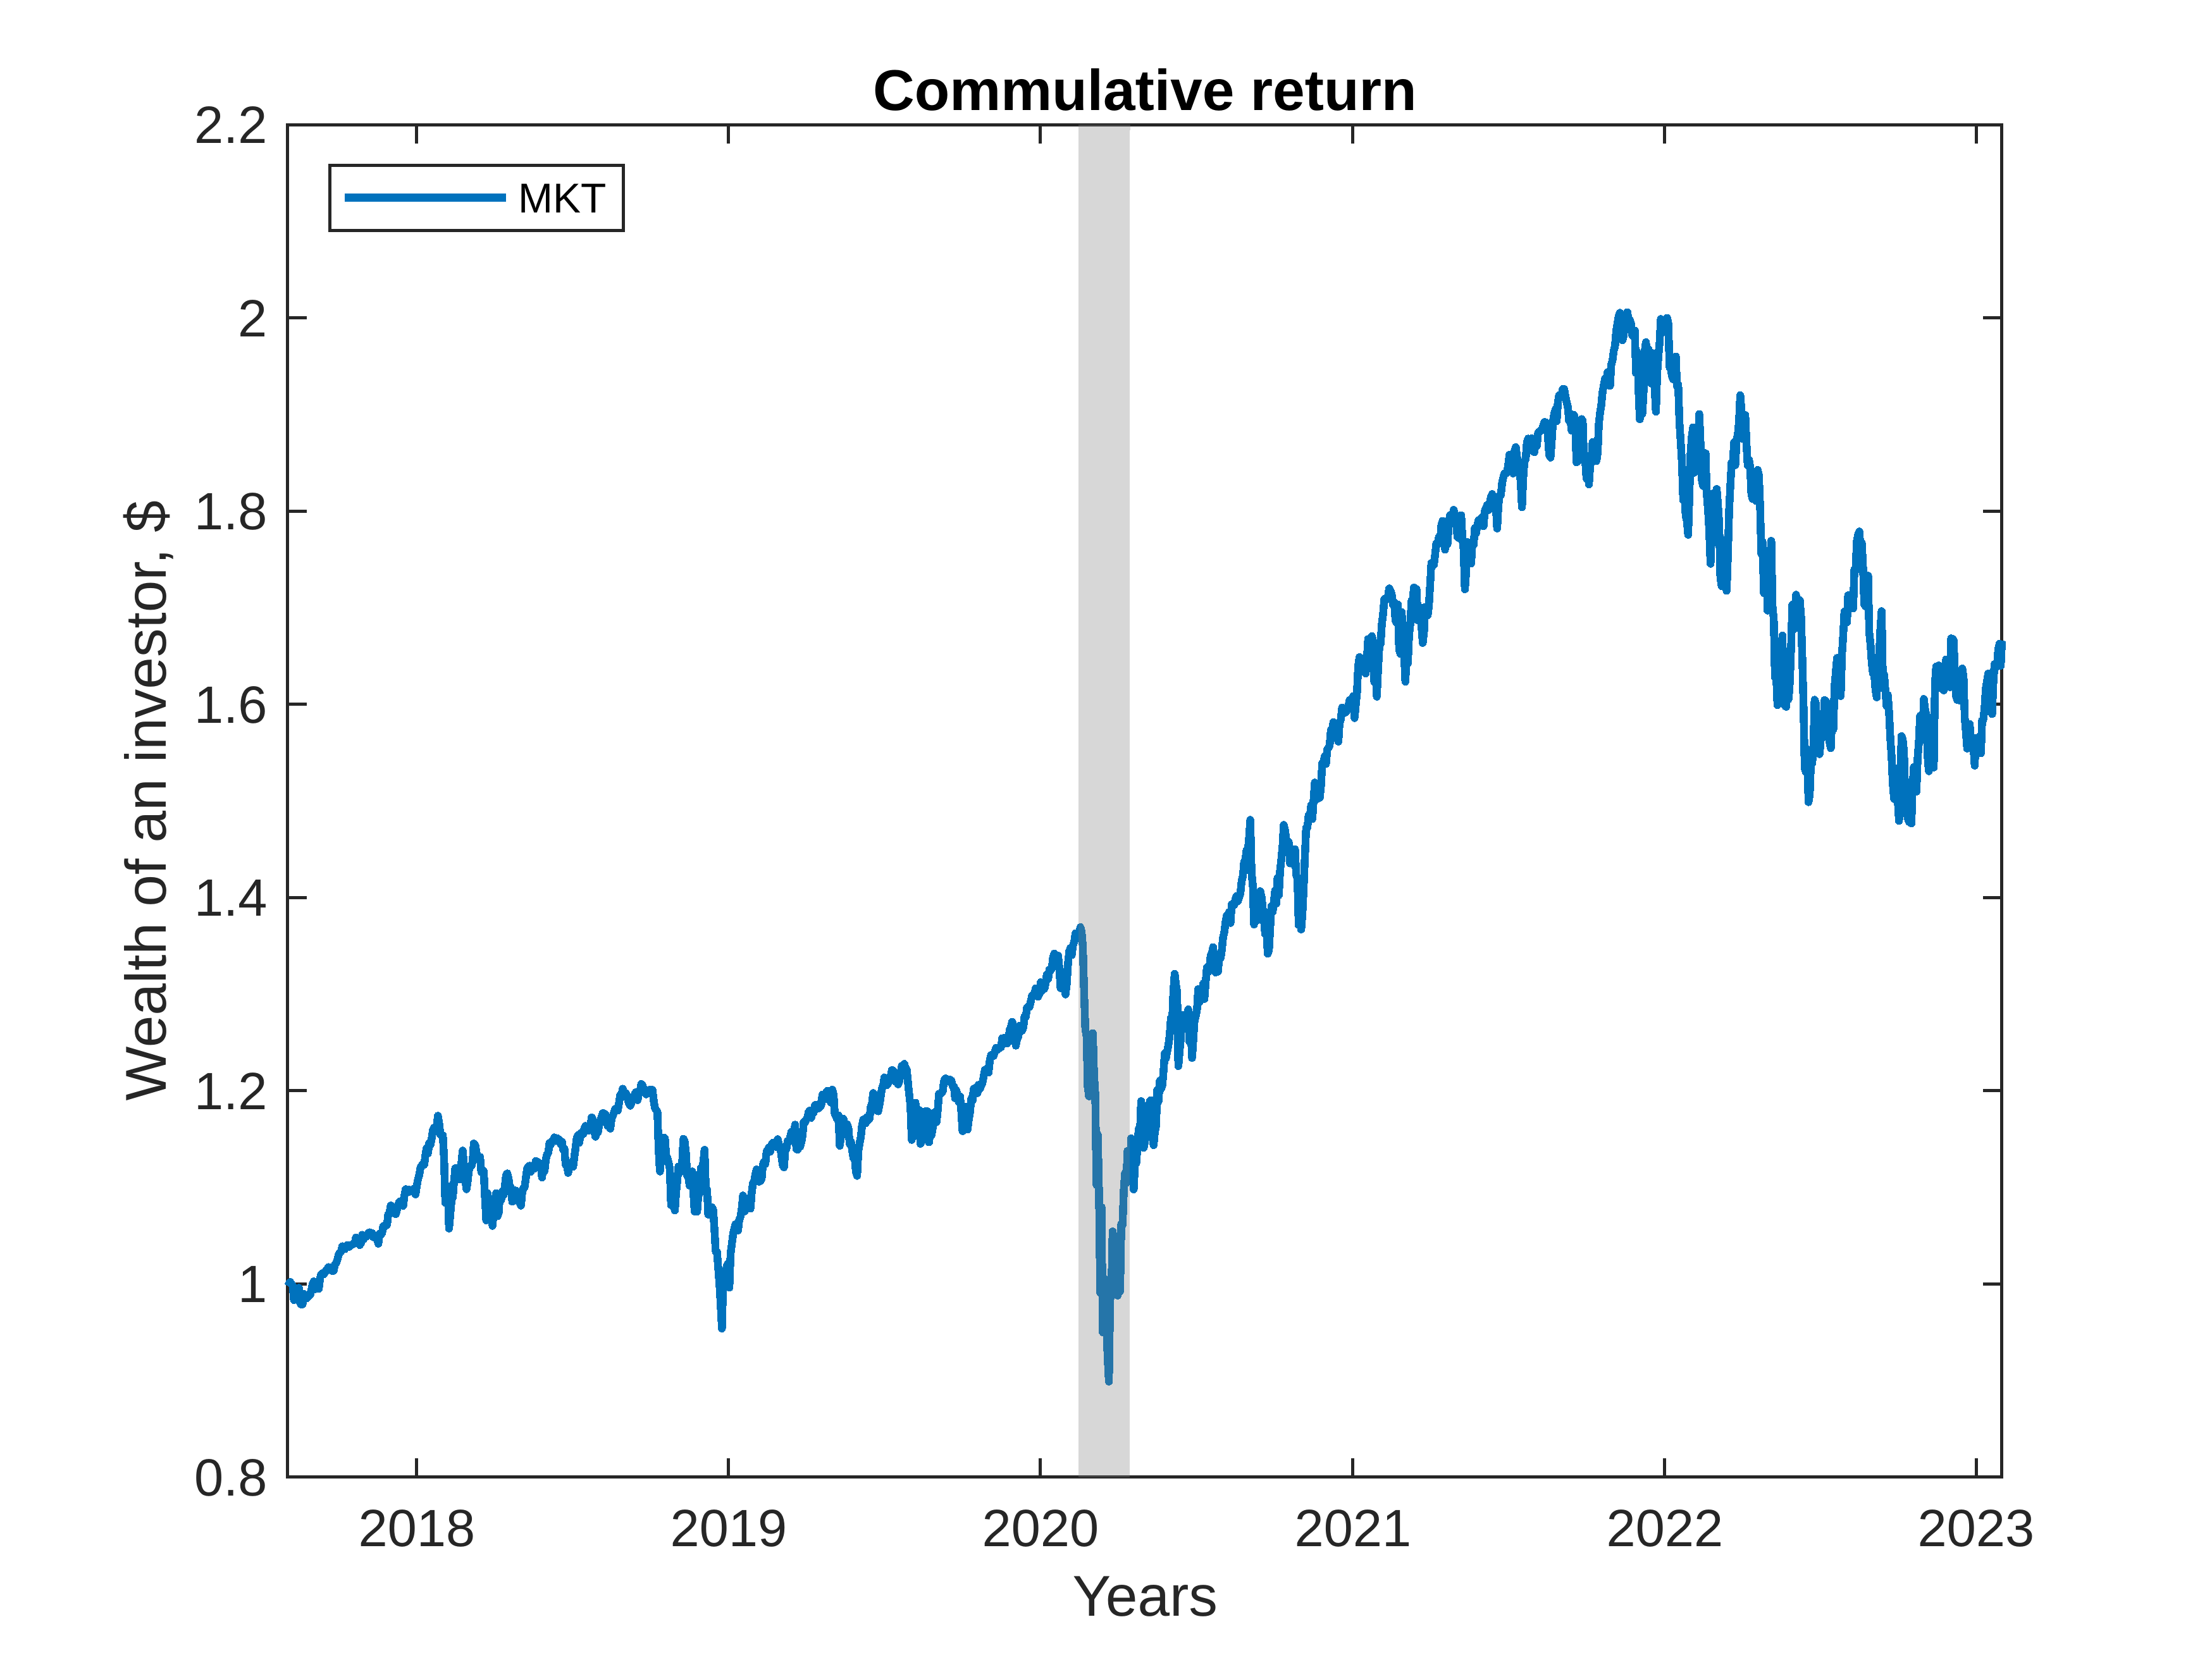

In [15]:
plot_comulative_returns(xData, benchmark, 'MKT');

### Construction of the correlation matrix


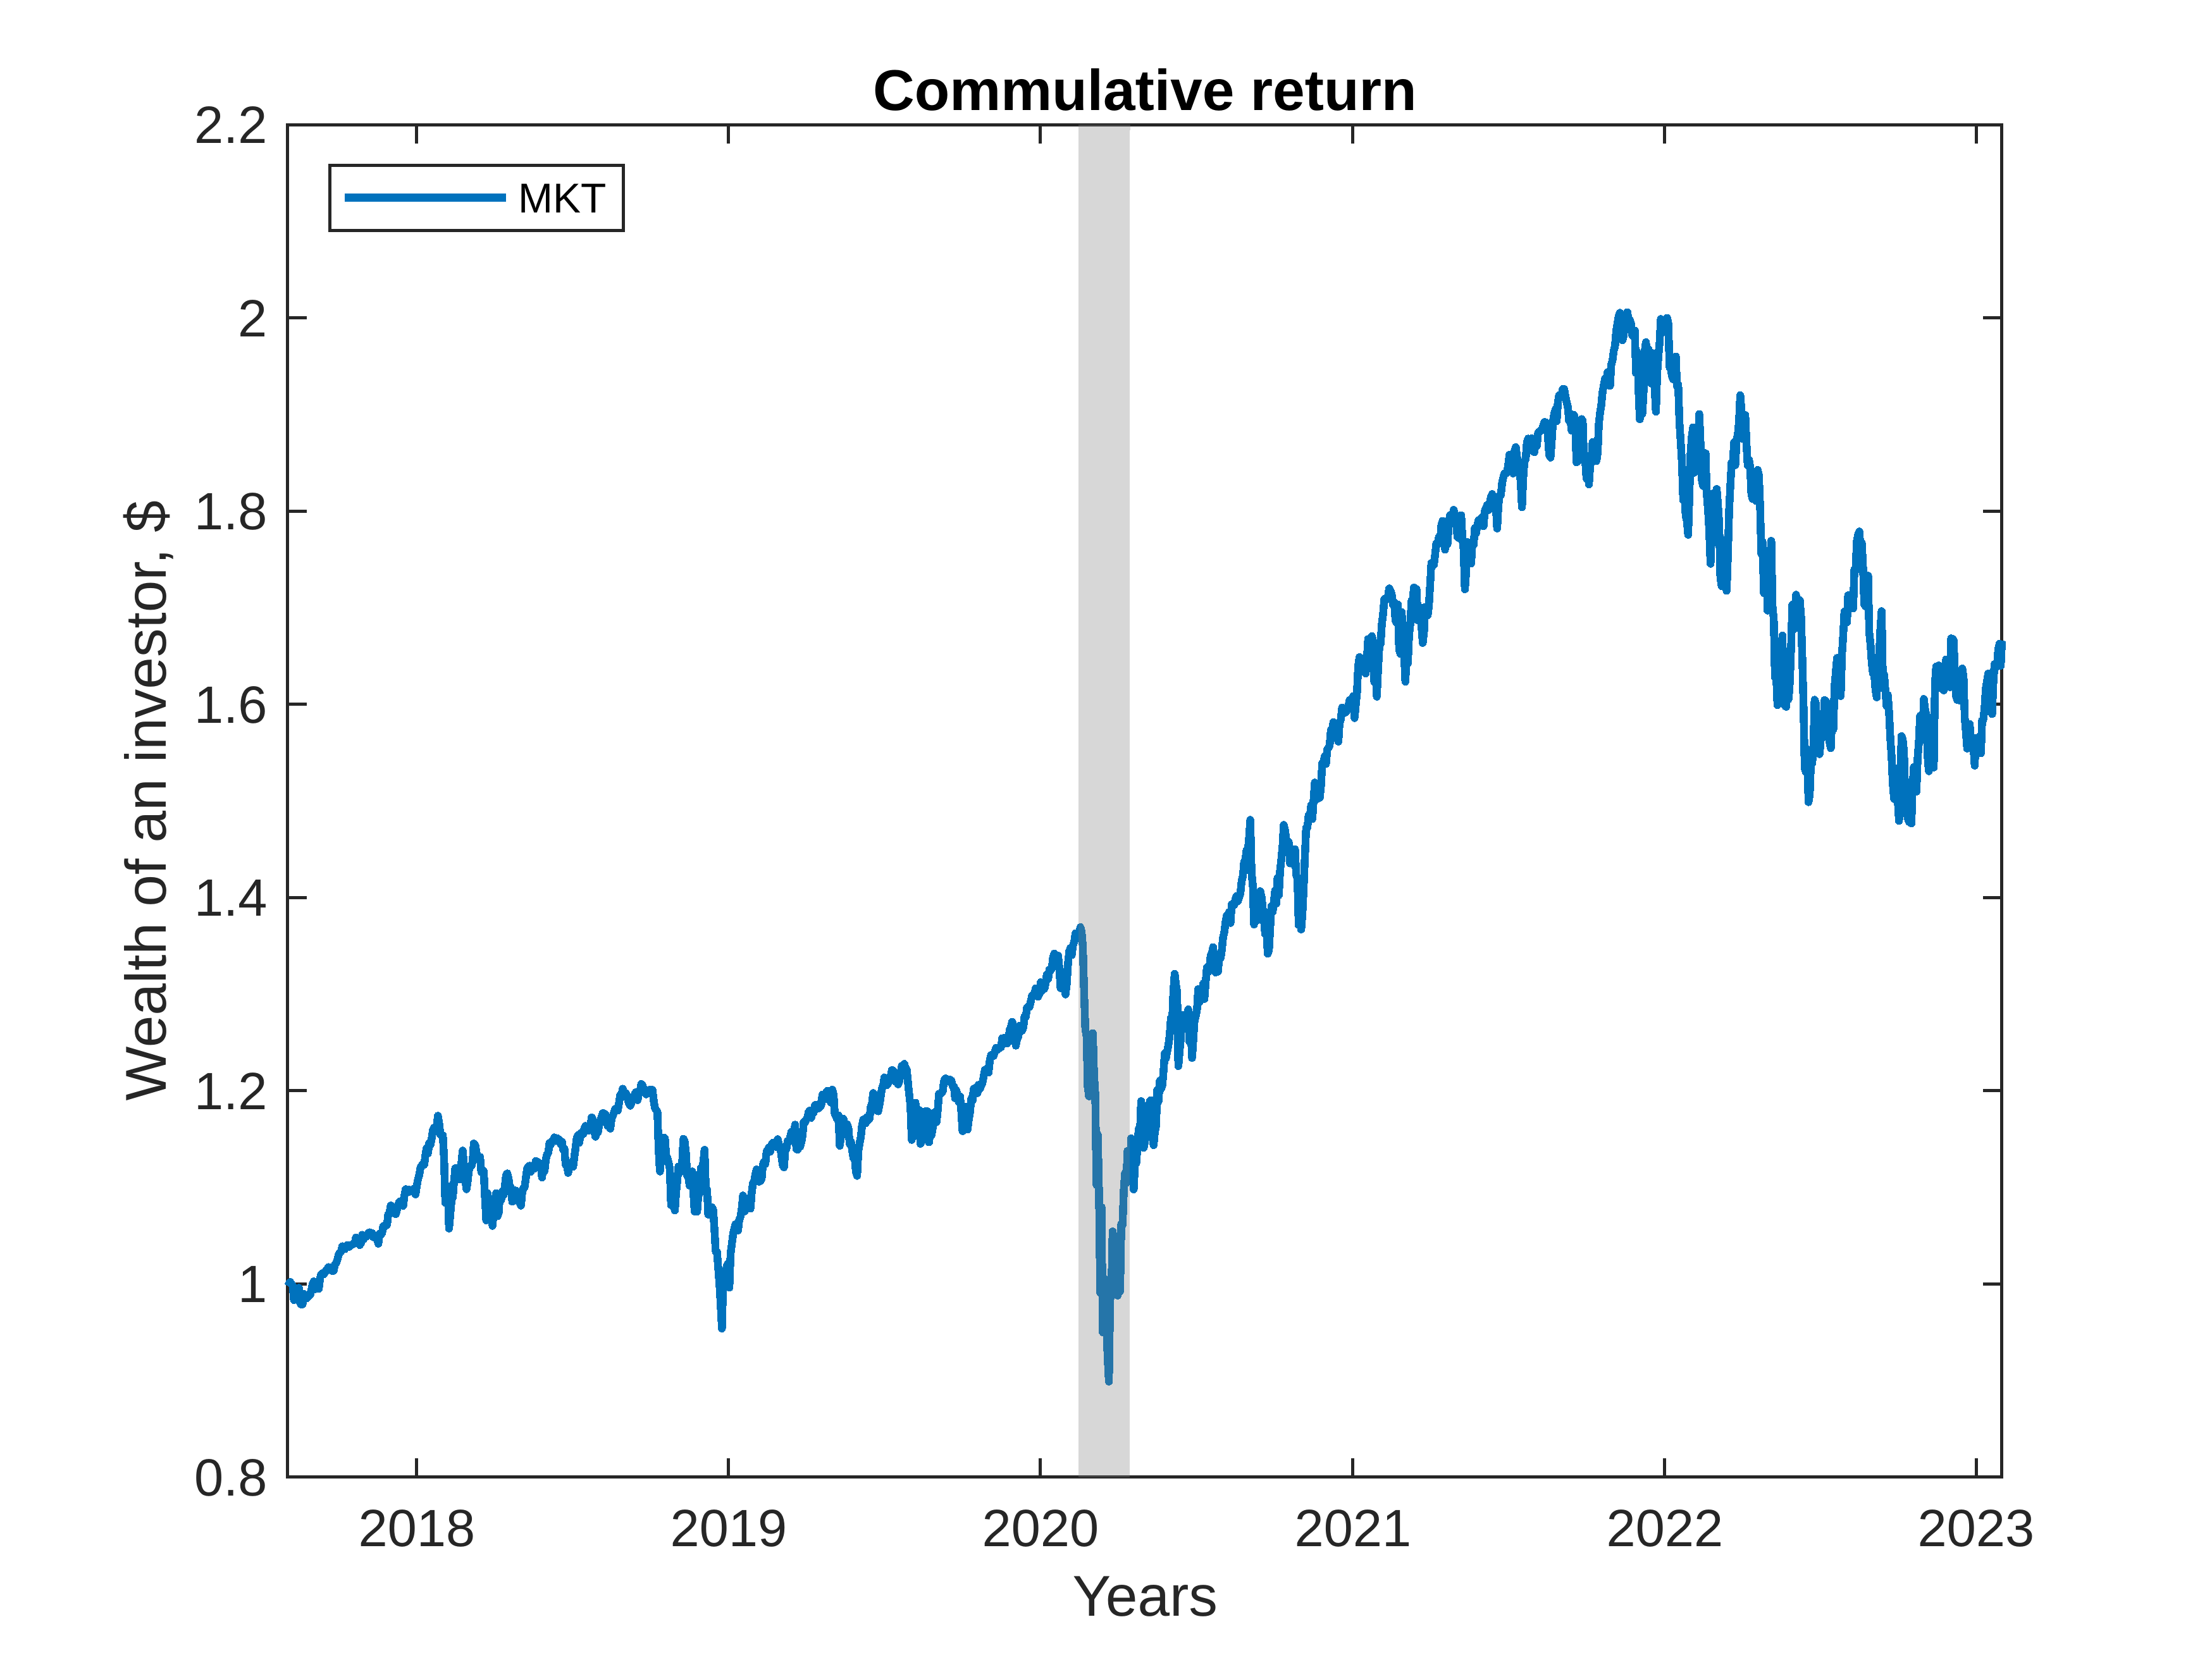

In [16]:
hold off


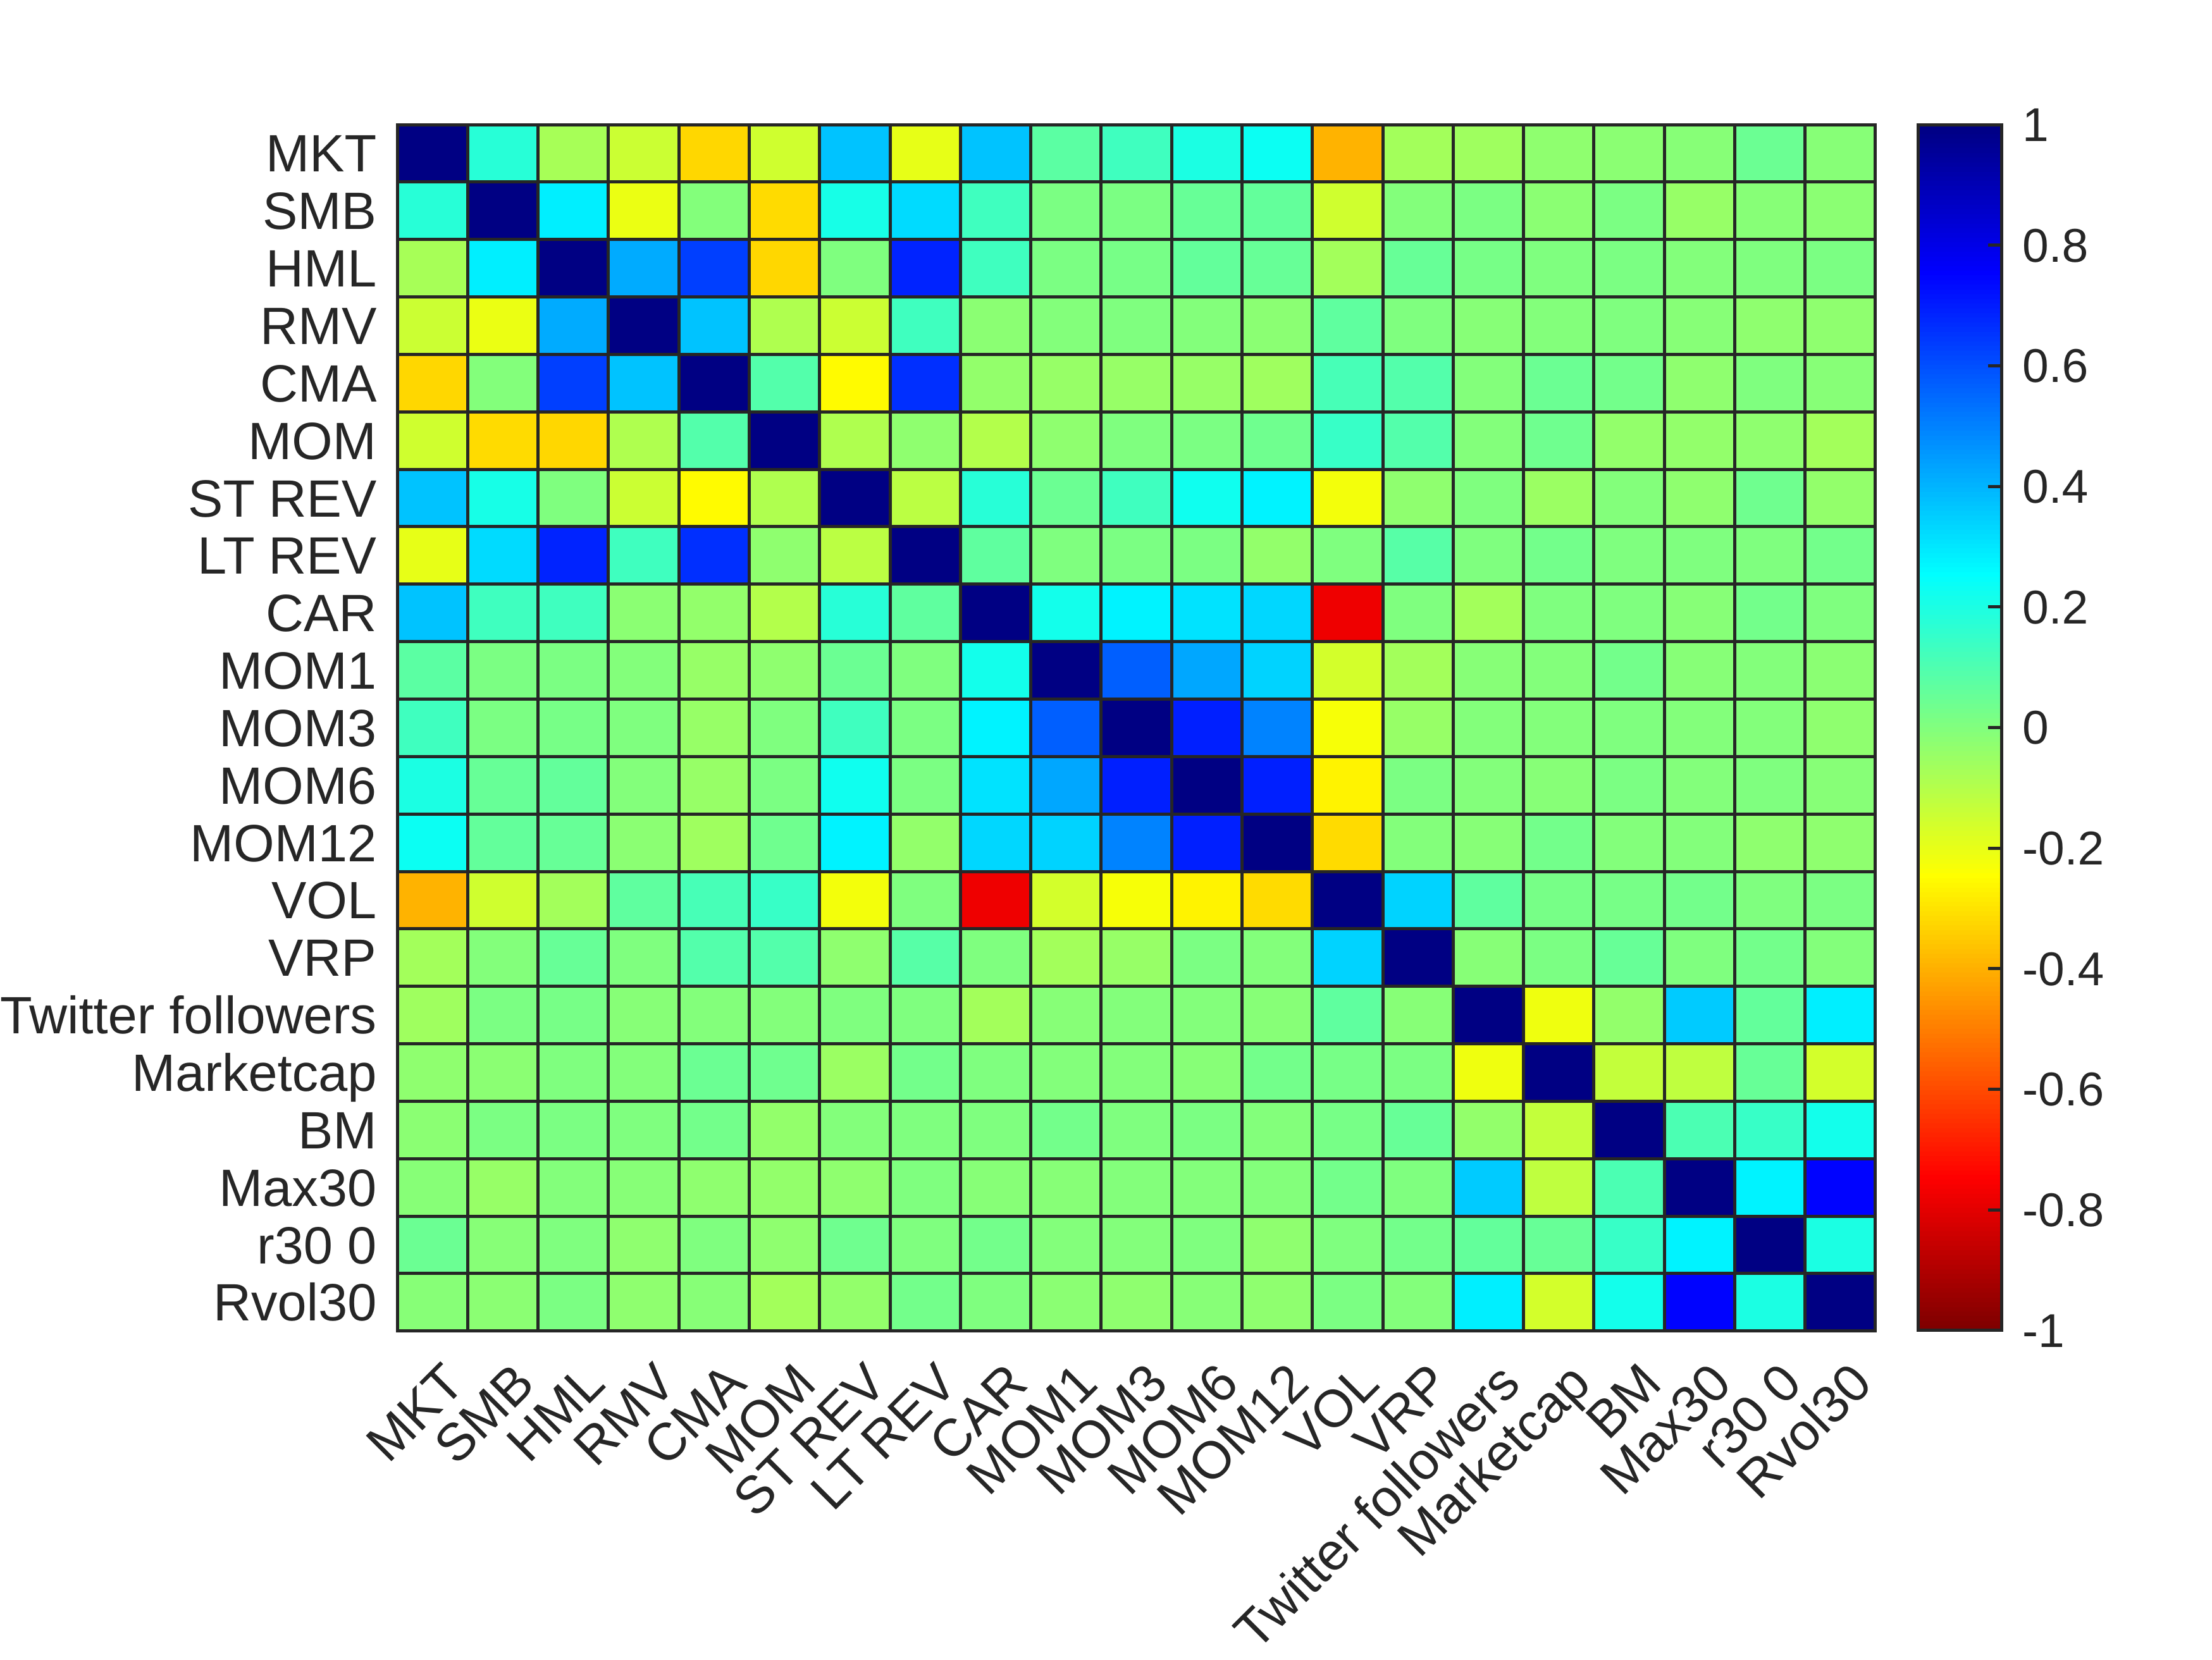

In [17]:
corr_matrix = corr([benchmark, factors]);
h = heatmap(corr_matrix);
h.XDisplayLabels = ['MKT'; equity_factor_names; currency_factor_names; crypto_factor_names];
h.YDisplayLabels = ['MKT'; equity_factor_names; currency_factor_names; crypto_factor_names];
colormap('jet');
colormap(flipud(colormap));
clim([-1 1]);